# CMSC478 - Assignment 0: Tech Setup and Getting Started with ML

## Instructor: Fereydoon Vafaei

Peter Ngaba JG77657

## Overview and Learning Objectives

This assignment prepares you for the upcoming assignments to make sure that you have setup the frameworks properly. It also provides some interesting resources (a few articles and videos) to get started with the ML world.

<b>Note</b>: You must download this notebook as .ipynb file, complete it on your own computer (do NOT run it on colab), and then submit the completed notebook as an .ipynb file to Blackboard.

# Part 1 - Python Setup

In <b>Part 1</b> of this Jupyter Notebook, you should run the following cell and make sure that your Python version is correct. Depending on what OS you're using, your output might be slightly different but the Python version must be 3.5 or higher.

In [3]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.9.7 (default, Sep 16 2021, 08:50:36) 
[Clang 10.0.0 ]
Version info.
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


> Next, run the following cell which is an example from [matplotlib documentstion](https://matplotlib.org/stable/gallery/index.html).

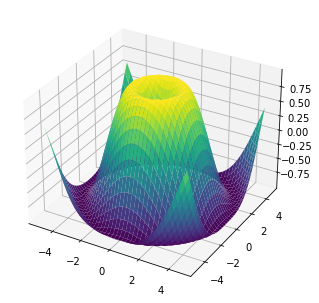

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.viridis)

>Next, run the following classifier comparison example from [scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py).

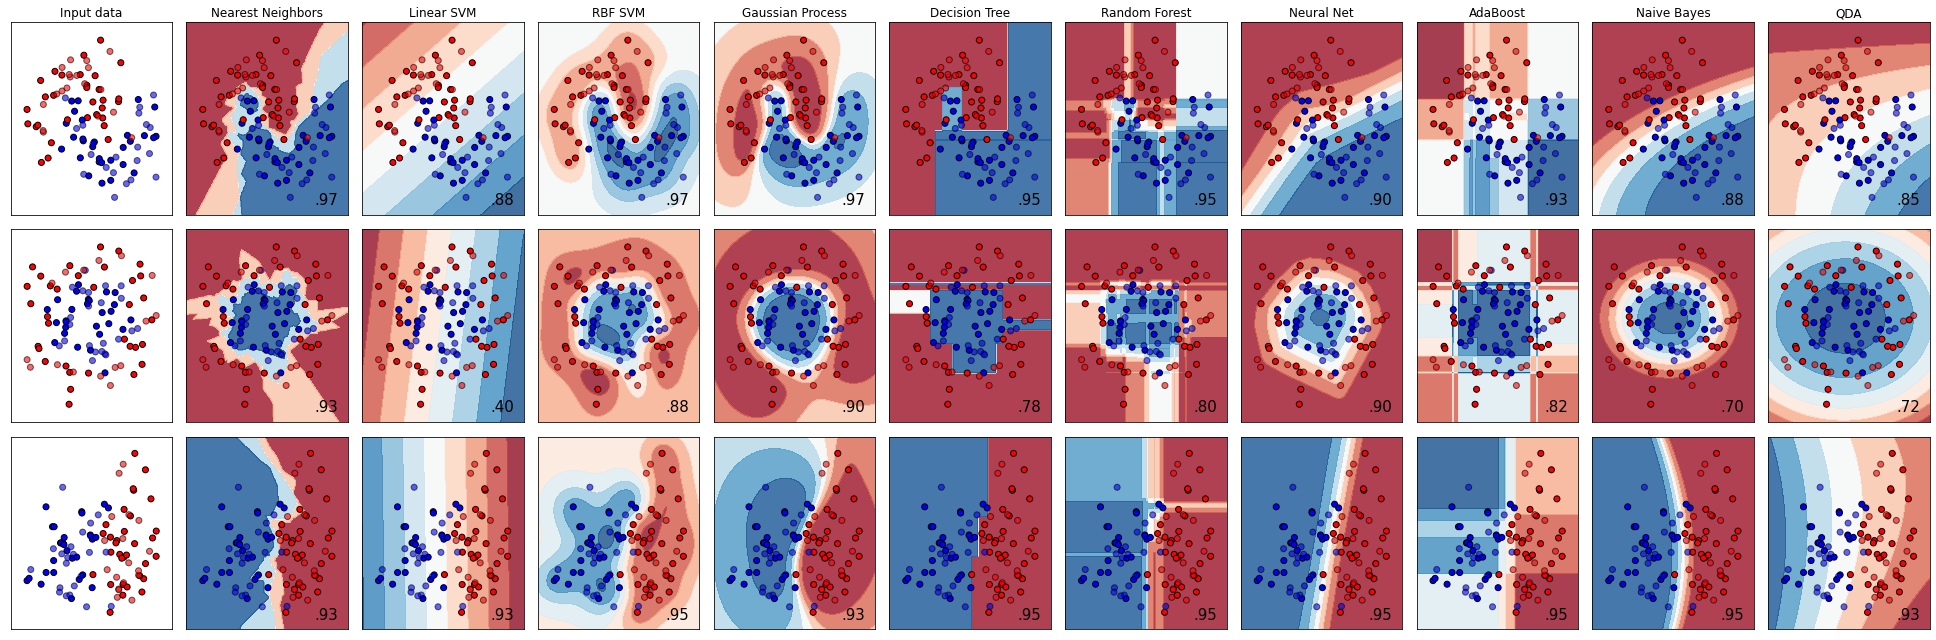

In [8]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()

## Part 2 - GAN Talk by Ian Goodfellow

In Part 2, watch the first 10 minutes of [Ian Goodfellow's talk](https://www.youtube.com/watch?v=sucqskXRkss) - the author of the [Deep Learning textbook](http://www.deeplearningbook.org/) - at ICLR-2019 conference where he discusses the recent advances in Adversarial Machine Learning. Don't worry if you don't fully understand what he explains. Generative Adversarial Network (GAN) is an advanced topic, and we've just started the basics of ML! Feel free to watch the entire talk.

Summarize your understanding of the first 10 minutes in a few sentences (at least a paragraph) HERE:

From what I gathered, Ian discusses the a Generative Adversial Network (GAN) which utilizes two systems, a generator and a discriminator. They work against each other to find the optimal solution in a zero-sum game where the discriminator is looking for the local maximum and the generator is looking for the local minimum thus finding a nash-equlibirium. The generator generates an output based on statiscal distribution and the discriminator recognizes the output as real or fake. The generator attempts to make the outputs undiscernible to the discriminator and the discrimnator attempts to correctly classify them creating a an adversial feedback loop improving the generative models created by the generator. Nash equilibrium exists where the genertor recovers the data distribution perfectly and the discriminator can do no better than random guessing that the input is real or fake.

## Part 3 - Twitter Investigation

Read the following article from BBC:

https://www.bbc.com/news/technology-54234822

Summarize the article in at least a paragraph in the following cell. Your summary should include the twitter investigation, what users found, what Zehan Wang found, and what a US government study about facial recognition suggested. DO NOT COPY/PASTE the article sentences, as it would be considered as plagiarism, and will be reported as academic misconduct.

Your summary goes HERE:

## Part 4 - Computer Vision

Read the following article: ["Understanding the differences between biological and computer vision"](https://bdtechtalks.com/2021/05/10/biological-computer-vision/). Summarize the following FOUR key takeaways from the article based on the book: [Biological and Computer Vision](https://www.cambridge.org/core/books/biological-and-computer-vision/BB7E68A69AFE7A322F68F3C4A297F3CF). Your summary should include ALL of the following FOUR differences:
- Hardware differences
- Architecture differences
- Goal differences
- Integration differences

DO NOT COPY/PASTE the article sentences, as it would be considered as plagiarism, and will be reported as academic misconduct.

Your summary goes HERE:
In the article, "Understanding the differences between biological and computer vision", Ben Dickinson provides a concise summary of the book "Biological and Computer Vision" by Professor Gabriel Kreiman. He does this by juxtaposing biological vision with computer vision utilizing arguments from the text.
Furthermore, he explains that the book's purpose is to explain how biological vision is the result of billion of years of evolution with immaculate complexity and many moving parts. However, he states that rather than recreating the wheel to make computer vision, it is more appropriate to take from nature's model and utilize those algorithms to create computer vision, a key step in the field of artifical intelligence.

Nevertheless, despite the insight there are limiting factors and key differences that make it harder for computer vision to have the same performance in juxtaposition with biological vision. One of the key differences is hardware differences. Biological vision runs on a network of cells and neurons while computer vision operates on chips that utilize transistors to send electrical signals, thus we must find a "Goldilocks level" which is not too abstract nor too detailed as the algorithmic model to implement. If we ignore how animals process vision then the algorithm would be rendered useless and inefficient; however, if we follow the biological blueprint down to the molecular level it would also be computationally inefficient. The medium we have found and currently utilize are neural networks.

Moreover, another key difference highlighted in the book and in the summary of the book are the architectural differences.
Kreiman explains the importance of convolutional layers which are utilized in deep learning where output from one layer is passed as the input to the next layer. However, the difference is that in biological vision, the information does not move in one direction but rather in multiple directions providing feedback to the layer preceeding it. This interconnectivity allows the brain to be more efficient and make inferences whereas in our computer models, information flows in one direction and the models that attempt to follow such an alogorithm are deemed not purposeful.

Another difference is the goal difference. Computer vision typically focuses on accomplishing one task as efficient or more efficiently than humans. However, biological vision has enabled us to be able to accomplish a variety of tasks and process a variety of inputs. While we can make a computer that can do a task equally as well or better, it is difficult and not yet known if it is feasible due to the space and time required to make a computer that can perform all the task we can perform with human-like or superior performance.

Lastly, Krieman highlights integration differences which he explains, in humans, integrates all of our senses from vision, hearing, touch, smell and taste to create an analysis or understand the world. However, for computers we are still rather early with emulating such behaviors thus we focus on one process at a time, but to reach true human peformance it is necessary to integrate all of them to analyze and see the world how humans do.

## Part 5 - Semi-Supervised Learning

Read the following article: ["What is semi-supervised Machine Learning?"](https://bdtechtalks.com/2021/01/04/semi-supervised-machine-learning/) and summarize the article.

Your summary must briefly explain ALL the techniques mentioned in the article and should also include a summary of the limitations of semi-supervised learning. DO NOT COPY/PASTE the article sentences, as it would be considered as plagiarism, and will be reported as academic misconduct.

Your summary goes HERE: 
In this text Dickinson discusses supervised, unsupervised and semi-supervised learning. He explains that supervised learning is a machine learning concepts that requires human annotate and label data to provide it the ground truth thus being able to perform classification and regression algorithms.
Furthermore, unsupervised learning is the opposite where the model is given unlabelled data set and utilizes the model to find patterns within the data set. Typically this is used to identify things that fit within those patterns or stand out.

However, semi-supervised learning is where the model is given  set of data where some of the data points are labeled and then it utilizes unsupervised learning to propagate those labels to similar things until the whole data set is labeled. Thus once it is fully labeled we can train another model using supervised learning to classify the test data.

Examples of this in the text are cluster and classification algorithm and semi-supervised support vector machines. Cluster and classification algorithm Dickinson discusses in the text utilizes a k-means algorithm with a create n clusters as specified by the user to seperate the training data into n distinctive clusters. Once it seperate it into enough clusters it propagate those labels to the data points near the centroid of the clusters utilizing euclidean distance function. Thus once all the data is labeled we can use supervised learning to train another label to solve the classification problem.

Dickinson explains that the semi-supervised support vector machine is a similar technique where the labeled data is propagated to unlabeled data and then further using the complete set of labeled data to make even better classifications of the unlabeled data.
Lastly, you can also train a model strictly on the labeled data then classify the unlabeled data with that model and once it is fully labeled you can train another model using supervised learning.

Despite the ingenuity of semi-supervised learning it has its limitations because the labels that are created must encompass and distinctive across the whole data set. In scenarios where that is not possible the solution is more labeled data but if the solution is more labeled data then Dickinson explains that it is essentially supervised learning and defeats the purpose of semi-supervision.

## Part 6 - Interpolation, Extrapolation and Linearisation

Watch the following video COMPLETELY:

https://www.youtube.com/watch?v=86ib0sfdFtw

Summarize the discussions in the video. Your summary should be at least FIVE paragraphs with the following headlines:

- Interpolation
- Extrapolation
- Linearisation
- Why is it important to distinguish between interpolation and extrapolation?
- Can DL models reason?

Your summary goes HERE:

- **Interpolation**:
You interpolate when a point is in between a point you already point. High definition - you interpolate when the u point is inside the convex hulll.



 Membership within this convex hull. Redefine interpolation on a higher dimension which is what neural networks are on. Linear interpolation is the intuitive sense of the term meaning that we can see if a new data point fits on the line, or within the constraints of the pattern that we have identified.
 Very task dependent
 No general defintion
 However, he explains that you want classify object, you must compress task to explain it with as a little factors of variation as needed and then use current def based on compression of data irregardless of finnicky details of data.
 However, defintiion varies depending on what you are trying to denote from your data.


- **Extrapolation**:
What if extrapolation is defined as being outside of the sample data range?
In between convex hull


- **Linearisation**:
Linearisation is fitting data into a straight line that fits all the data points which can further be used for linear extrapolation or interpolation.

- **Why is it important to distinguish between interpolation and extrapolation?**

Is interpolation and extrapolation useful dichotomoy. Linear convention, convex hull membership. High defintion learning is extrapolation. what is significance of agreeing or disagreeing. 
Whole point of the paper is to show that this distinguishment is not useful. Limitation to machine learning becuase it only does curve fitting which only work interpolation and not extrapolation.
Wrong analysis because in high definition, things work differently. Help some people 


- **Can DL models reason?**
The short answer is no

##  Grading

- Assignment-0 has 35 points. Parts 1-5 have 5 points each. Part 6 has 10 points.

- Grading will be based on completeness and correctness of all the required tasks, prompts and summaries.

- <b>Note:</b> Incomplete summaries will get ZERO. Copy/pasted summaries will get ZERO and will be reported as academic misconduct.

- Points will be deducted if you have mistakes in naming the files.

## Submission

Name your completed notebook ```Lastname-A0.ipynb```.  

Submit the .ipynb file using the ```Assignment-0``` link on Blackboard.
  
<font color=red><b>Due Date: Thursday Feb 10, 11:59PM</b></font>